In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/dataset_2.csv')

In [63]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,04-06-2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,22-05-2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,01-03-2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
3,4,29-09-2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
4,5,03-12-2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0


In [64]:
df.shape

(90, 18)

In [65]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6123.547647,1.788889,3.500000,3.188889,-86.366477,29.449963,0.666667
std,26.124701,4732.115291,1.213172,1.595288,4.194417,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,4.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,13.000000,-80.577366,34.632093,1.000000


### Payload Mass Vs Flight Number

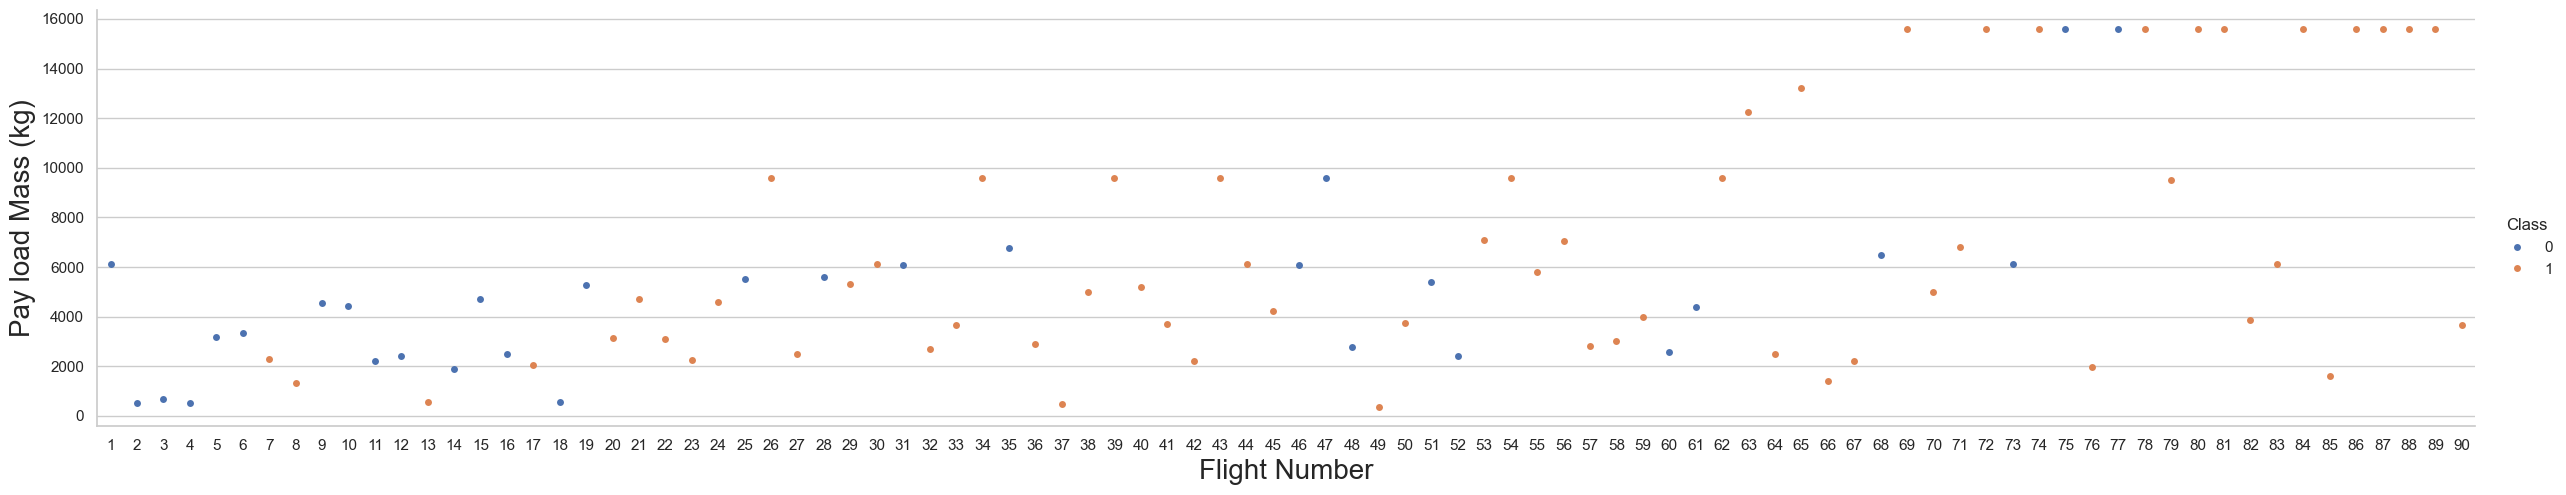

In [66]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df,aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

* As payload mass increases, the number of failure decreases
* Flights with payload mass below 4000 kg are least successful


### Launch Site  Vs Flight Number

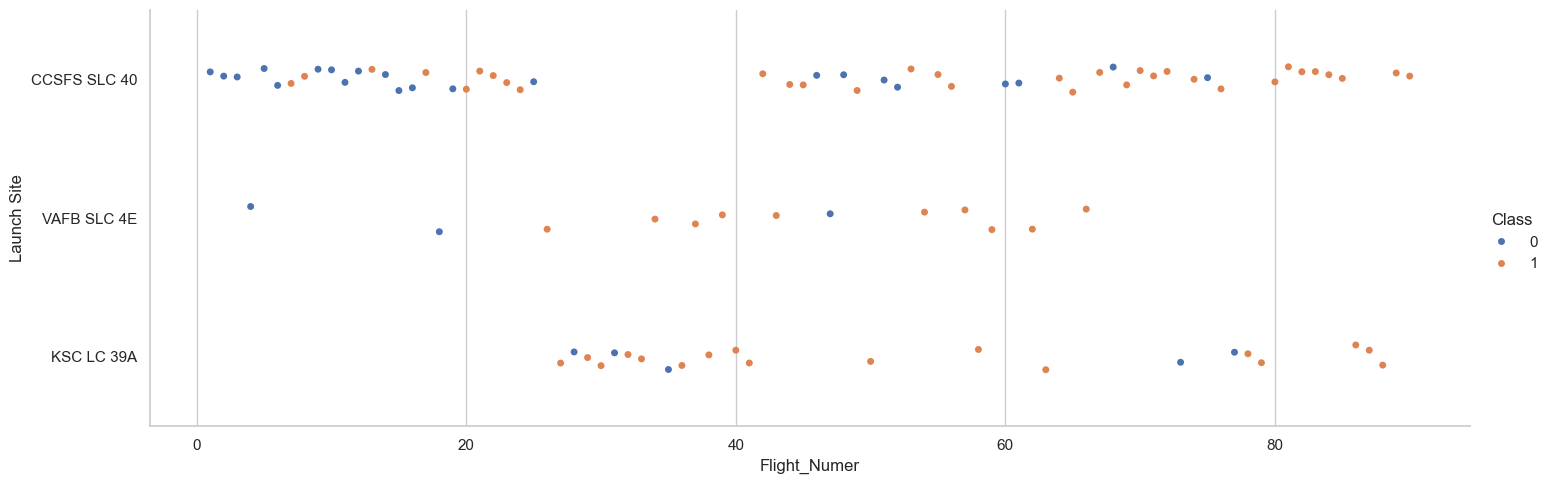

In [67]:
sns.catplot(y='LaunchSite',x='FlightNumber',hue = 'Class',data = df, aspect=3)
plt.xlabel('Flight_Numer')
plt.ylabel('Launch Site')
plt.show()

* VAFB LC 4E and KSC LC 39A have a higher success rate than CCSFS SLC 40
* CCSFS SLC 40 is the most used launch site
* VAFB SLC 4E is the least used launch site 


### Launch Site Mass Vs PayloadMass

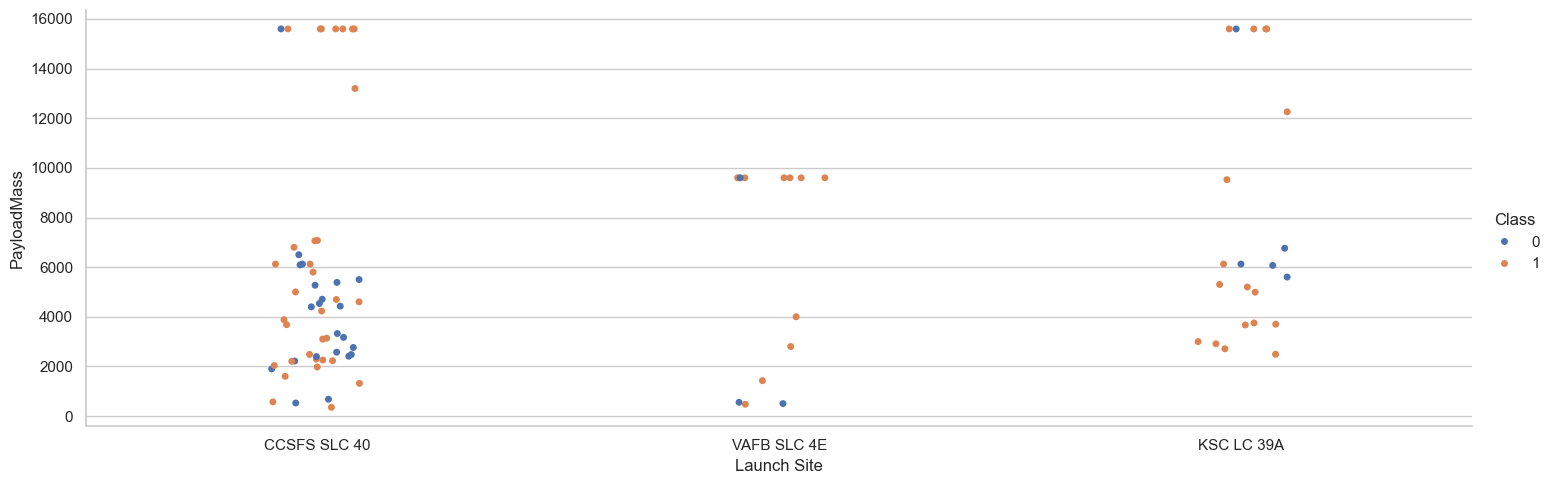

In [68]:
sns.catplot(y='PayloadMass',x='LaunchSite',hue = 'Class',data = df, aspect=3)
plt.ylabel('PayloadMass')
plt.xlabel('Launch Site')
plt.show()

In [69]:
xvalue = df.groupby('Orbit')['Class'].mean()
xindex = xvalue.index

### Success rate of each orbit

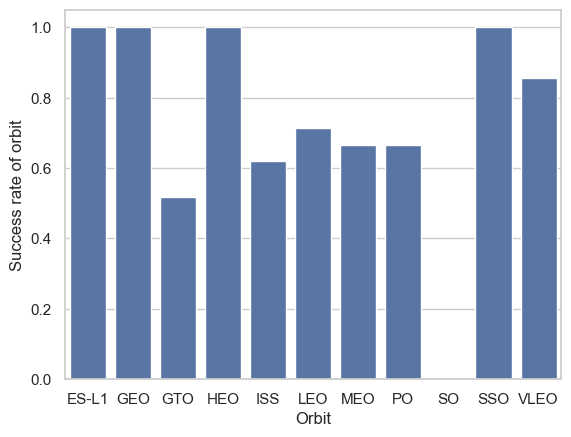

In [70]:
sns.set_theme(style="whitegrid")
sns.barplot(x = xindex, y = xvalue)
plt.xlabel('Orbit')
plt.ylabel('Success rate of orbit')
plt.show()

* ES-L1, GEO, HEO, SSO have 100% success tare
* SO has a success rate of 0 %
* Only GTO has a success rate below 50%

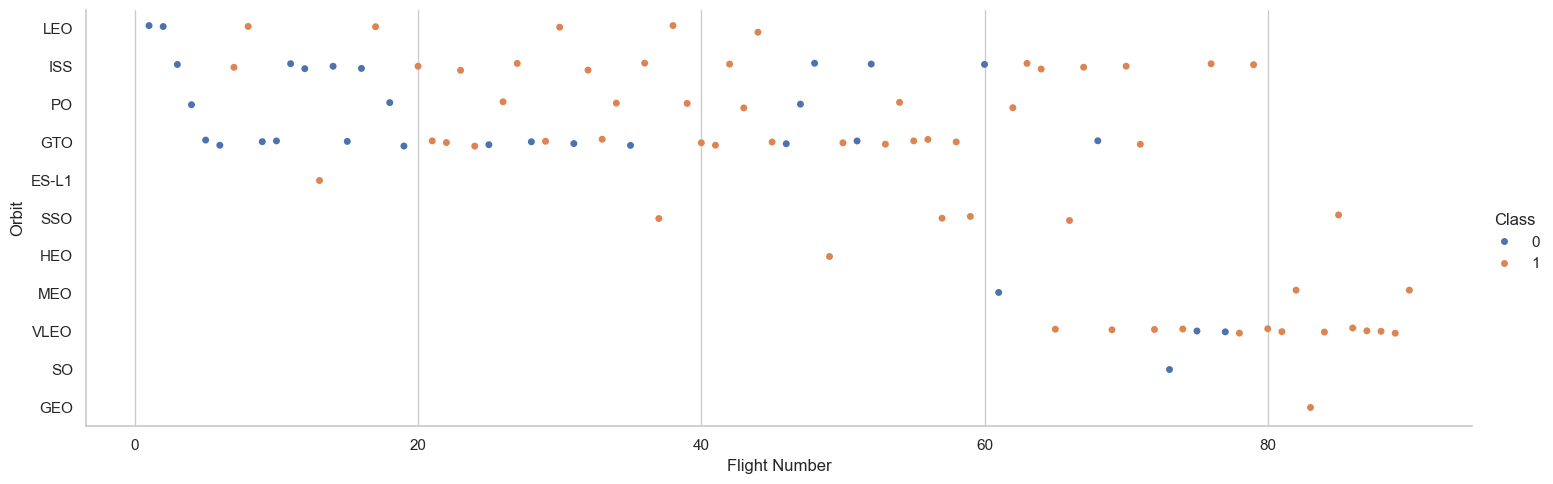

In [71]:
sns.catplot(y='Orbit',x='FlightNumber',hue = 'Class',data = df, aspect=3)
plt.ylabel('Orbit')
plt.xlabel('Flight Number')
plt.show()

* GTO and ISS orbits have the higest unsuccessful flight number
* SSO, ES-L1, GEO and HEO have 100% success rate


### Payload Mass vs Orbit

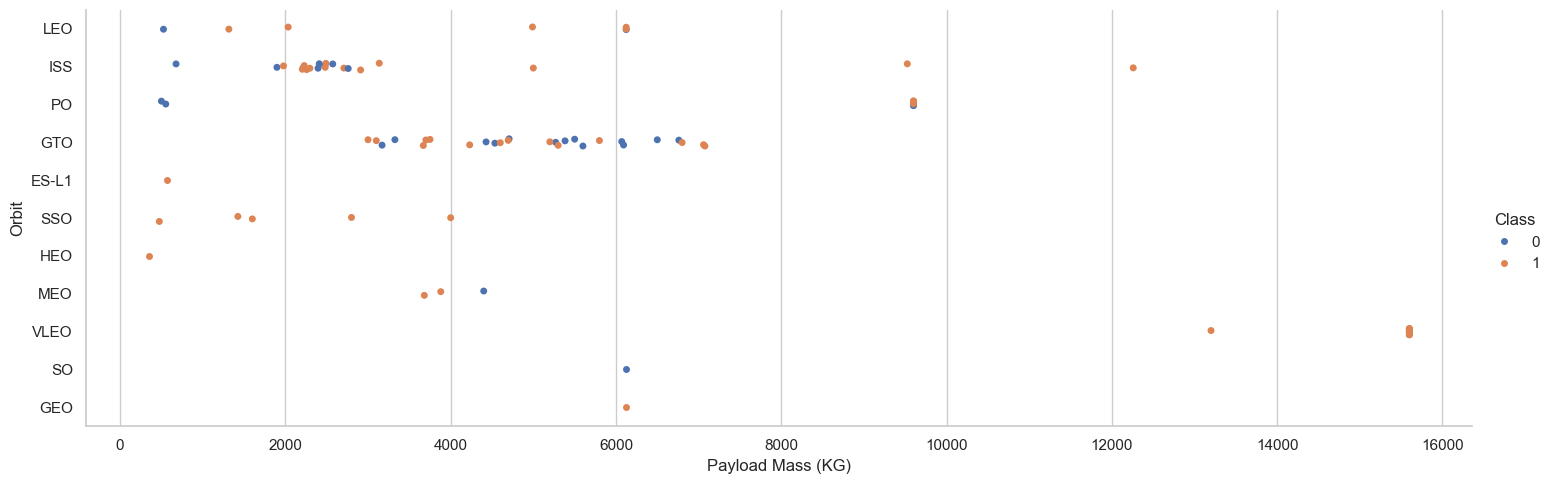

In [72]:
sns.catplot( x = 'PayloadMass', y = 'Orbit', hue = 'Class', data = df, aspect= 3)
plt.xlabel('Payload Mass (KG)')
plt.ylabel('Orbit')
plt.show()

* Most flights have a payload mass under 8000 kgs
* Flights in SSO orbit have 100 success rate and have a payload mass of under 4000 kg
* Flights in GTO orbit have 50% success and failure rates, and have payload mass between 2500 kg and 6600kg
* Glights with payloadmass over 8000 kg have a higher success rate

### Yearly trend of launch success

In [73]:
# function to extract year from the date column
year = []
def extract_year():
    for i in df['Date']:
        year.append(i.split('-')[2])
        
    return year

df['Year'] = extract_year()        

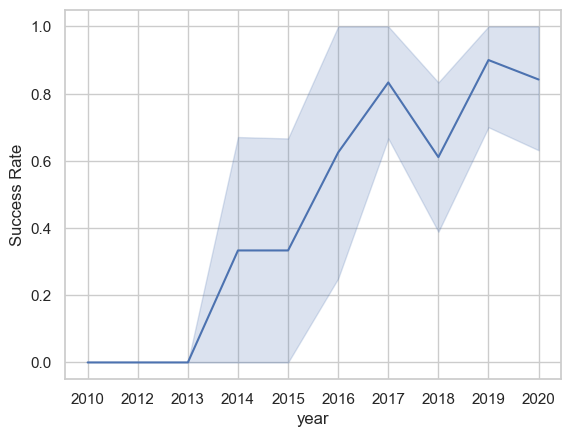

In [74]:
sns.lineplot(data = df, x = 'Year', y = 'Class')
plt.xlabel('year')
plt.ylabel('Success Rate')
plt.show()

* There was no successful flight from the year 2010 - 2012
* No of successful flight increased steadly over the years
* There was a dip in the success rate in the year 2017

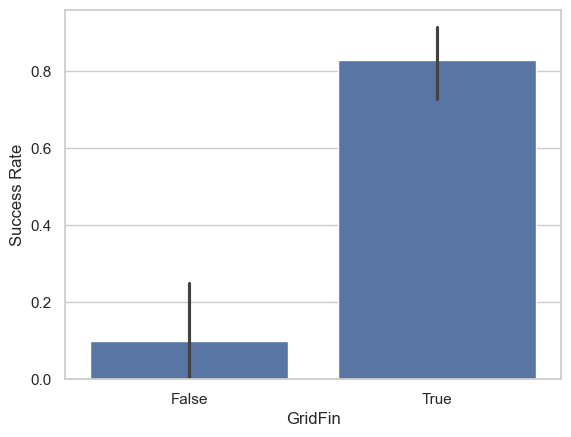

In [75]:
sns.barplot(data = df, x = 'GridFins', y = 'Class')
plt.xlabel('GridFin')
plt.ylabel('Success Rate')
plt.show()

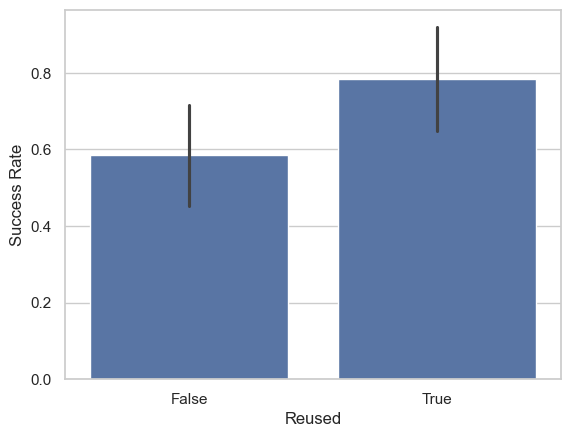

In [76]:
sns.barplot(data = df, x = 'Reused', y = 'Class')
plt.xlabel('Reused')
plt.ylabel('Success Rate')
plt.show()

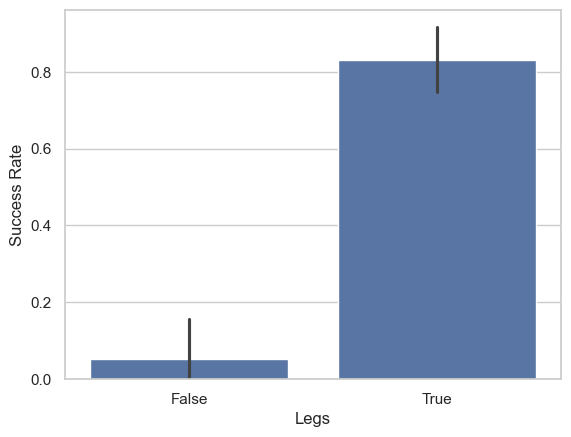

In [77]:
sns.barplot(data = df, x = 'Legs', y = 'Class')
plt.xlabel('Legs')
plt.ylabel('Success Rate')
plt.show()

Features that affect the success rate of a flight are: FlightNumber PayloadMass Orbit LaunchSite Flights GridFins ReusedCount Legs LandingPad Block ReusedCount Serial

In [80]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
categorical_features = df[['Orbit','LaunchSite','Serial','LandingPad']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1,0,B1004


In [82]:
# Categorical features: Orbit, LaunchSite, Serial, LandingPad
# performing oneHotEncoding for the categorical values
one_hot_encoding = pd.get_dummies(features, columns=['Orbit','LaunchSite','Serial','LandingPad'], dtype= int)
print(one_hot_encoding)


    FlightNumber   PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0              1   6123.547647        1     False   False  False      1   
1              2    525.000000        1     False   False  False      1   
2              3    677.000000        1     False   False  False      1   
3              4    500.000000        1     False   False  False      1   
4              5   3170.000000        1     False   False  False      1   
..           ...           ...      ...       ...     ...    ...    ...   
85            86  15600.000000        2      True    True   True      5   
86            87  15600.000000        3      True    True   True      5   
87            88  15600.000000        6      True    True   True      5   
88            89  15600.000000        3      True    True   True      5   
89            90   3681.000000        1      True   False   True      5   

    ReusedCount  Orbit_ES-L1  Orbit_GEO  ...  Serial_B1056  Serial_B1058  \
0             0        

In [83]:
one_hot_encoding.astype("float64")
one_hot_encoding.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,1,6123.547647,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
one_hot_encoding.to_csv('dataset_3.csv', index=False)
